In [1]:
import tensorflow as tf
from tensorflow import keras
import re
import pandas as pd
import copy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:

from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.layers import Dense, Embedding, Reshape, Concatenate, Input, Flatten
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.models import load_model

In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, draw, show

plt.style.use('classic')
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

import quantecon as qe
from quantecon import MarkovChain
import itertools
import random

In [5]:
# lista_acoes = [
#     #'^BVSP','ABEV3.SA','BBDC4.SA'#B3SA3.SA TEM 2 ISNA
# #             ,'BRFS3.SA','CCRO3.SA','CIEL3.SA','CMIG4.SA'
# #             ,'CSAN3.SA','CYRE3.SA','DTEX3.SA','ELET6.SA'
# #             ,'EMBR3.SA','GOLL4.SA','ITUB4.SA','JBSS3.SA','LREN3.SA'
# #             ,'LAME4.SA','PETR4.SA','TIMS3.SA','USIM3.SA','VALE3.SA','VIVT3.SA'
#             '^BVSP','ABEV3.SA','BBDC4.SA'
#             ,'BRFS3.SA','CCRO3.SA','CIEL3.SA','CMIG4.SA'
#             ,'CSAN3.SA','CYRE3.SA','ELET6.SA'
#             ,'EMBR3.SA','GOLL4.SA','JBSS3.SA','LREN3.SA'
#             ,'LAME4.SA','PETR4.SA','TIMS3.SA','VIVT3.SA'
# #               ,'CIEL3.SA','CYRE3.SA','ELET6.SA','ITUB4.SA','JBSS3.SA','LREN3.SA','PETR4.SA','VALE3.SA'
#       #'USIM3.SA','VALE3.SA','DTEX3.SA'         
#          ]

In [6]:

# lista_acoes = ['BOVA11.SA','ABEV3.SA','BBDC4.SA'#B3SA3.SA TEM 2 ISNA
#              ,'BRFS3.SA','CCRO3.SA','CIEL3.SA','CMIG4.SA'
#              ,'CYRE3.SA','ELET6.SA'
#              ,'GOLL4.SA','ITUB4.SA'
#             ,'JBSS3.SA','LAME4.SA','LREN3.SA','KLBN4.SA','MRVE3.SA'
#             ,'PETR4.SA','TIMS3.SA','VIVT3.SA','VALE3.SA'               
#          ]
lista_acoes = ['BOVA11.SA','BBDC4.SA']               
#          

In [7]:
# from backtesting import Backtest, Strategy
# from backtesting.lib import crossover

# from backtesting.test import SMA, GOOG

# teste=df_acoescompleto[acao]

# class SmaCross(Strategy):
#     def init(self):
#         price = self.data.Close
#         self.ma1 = self.I(SMA, price, 10)
#         self.ma2 = self.I(SMA, price, 20)

#     def next(self):
#         if crossover(self.ma1, self.ma2):
#             self.buy()
#         elif crossover(self.ma2, self.ma1):
#             self.sell()


# bt = Backtest(teste, SmaCross, commission=.003,
#               exclusive_orders=True)
# stats = bt.run()
# bt.plot()

In [8]:
# stats

In [9]:
lookback = 5
num_clusters=3
item_renda_var='BBDC4.SA'
#txt esta em bbdc 3 clusters
#item_renda_var='BBDC4.SA'
str_colunas=['1','2','3','4','5']
str_colunas_sem=['1','2','3','4']
int_colunas=[1,2,3,4,5]
full_colunas=[1,2,3,4,5,6,7,8,9,10]
colunas_separados_classes=[1,2,3,4,5,'alvo']
ultima_pos=len(int_colunas)-1
data_start_treino='2010-6-30'
data_end_treino='2020-12-30'
data_start_test='2021-1-1'
data_end_test='2021-7-30'
casasFinal=75
tamanhoListas=1 #listas do teste montecarlo
tamanhoPrev=10

In [10]:
from pandas_datareader._utils import RemoteDataError

df_acoes = pd.DataFrame()
try:
    for a in lista_acoes: 
        df_acoes [a] = wb.DataReader(a, data_source ='yahoo', start = data_start_treino, end=data_end_test)['Adj Close']
except RemoteDataError:
    print('yahoo fora do ar')

In [11]:
df_acoes.isna().sum()

BOVA11.SA    0
BBDC4.SA     0
dtype: int64

In [12]:
pd.set_option('display.max_rows', 30)


<AxesSubplot:xlabel='Date'>

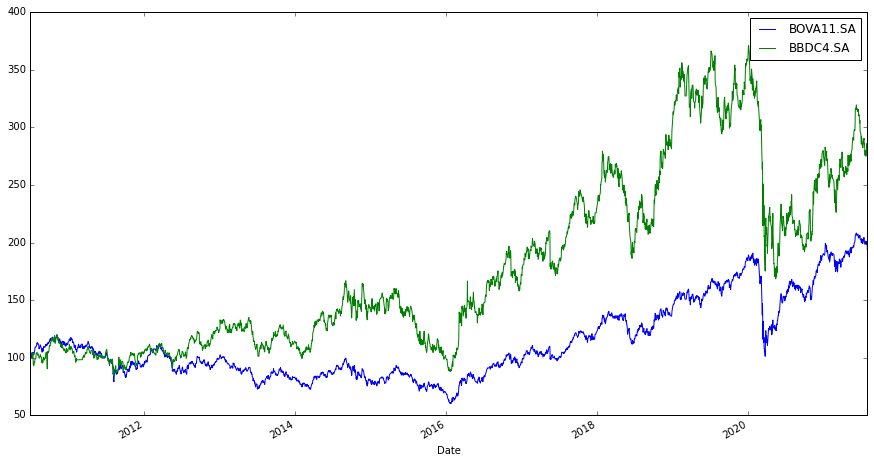

In [13]:

#df_acoes.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)
(df_acoes / df_acoes.iloc[0] * 100).plot(figsize=(15,8)) 

In [14]:
# acao=pd.DataFrame(pd.read_csv('bvsp.csv',index_col='Date',usecols=['Date','Adj Close']))
# acao.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)
# acao

In [15]:
#(acao / acao.iloc[0] * 100).plot(figsize=(15,8)) 

In [16]:
# df_acoes=acao
# df_acao.columns = ['data','fechamento'] 

In [17]:
dates = df_acoes.index
separados={}
for acao in df_acoes:
    #print(acao)
    #print(df_acoes[acao])
    #print("Proximo")
    
    prices = list(df_acoes[acao].values)
    counter_ = -1
    price_series = []
    for day in dates:
        counter_ += 1
        # if counter_ % 1000 == 0: print(counter_)
        if counter_ >= lookback:
            price_series.append(prices[counter_-lookback:counter_])
            #print(prices[counter_-lookback:counter_])

    separados[acao]=pd.DataFrame(price_series) 

In [18]:
aux=copy.deepcopy(separados)

In [19]:
porcentagens={}
for acao in aux:
    #print(aux[acao])
    resultados=[]
    for item in aux[acao].itertuples():
        row=[]
        for x in range (1,lookback+1):
            row.append(item[x])
        arr=np.array(row)
        #print (arr)
        cont=0
        porcentagem=[]
        for j in range (1,lookback):
            resp=((arr[j] / arr[0] * 100))-100
            #print (resp)
            #print ("\n",arr[j])
            porcentagem.append(resp)

        #print("\n")
        resultados.append(porcentagem)
        porcentagens[acao]=pd.DataFrame(columns=str_colunas_sem,data=resultados)

In [20]:
clusters={}
separados_completo=copy.deepcopy(separados)
for acao in lista_acoes:
    kmeans = KMeans(n_clusters=num_clusters,random_state=1, init='k-means++',n_init=30, max_iter=500)
    clusters[acao] = kmeans.fit_predict(porcentagens[acao])
    separados_completo[acao]['classe']=clusters[acao]

In [21]:
ascendente={}
queda={}
for acao in lista_acoes:
    maior=None
    menor=None
    for num_class in range(0,num_clusters):
        print(acao,num_class)
        dividido_classes=separados_completo[acao].loc[separados_completo[acao]['classe']==num_class]
        dif=dividido_classes[ultima_pos].mean()-dividido_classes[0].mean()
        if num_class==0 or dif > maior:
            maior=dif
            ascendente[acao] = num_class
        if num_class==0 or dif < menor:
            menor=dif
            queda[acao] = num_class
        print(dif)
    print('maior diferenca da {} = {}'.format(acao,maior))
    print('menor diferenca da {} = {}'.format(acao,menor))
    print('classe ascendente= {}'.format(ascendente[acao]))
    print('classe queda= {}'.format(queda[acao]))
        #print(separados_completo[acao].to_markdown(tablefmt="simple"))

BOVA11.SA 0
2.319399102629177
BOVA11.SA 1
-2.1864732798408113
BOVA11.SA 2
0.18021219329727955
maior diferenca da BOVA11.SA = 2.319399102629177
menor diferenca da BOVA11.SA = -2.1864732798408113
classe ascendente= 0
classe queda= 1
BBDC4.SA 0
-0.6947943912612065
BBDC4.SA 1
0.08278429940242837
BBDC4.SA 2
0.8287779615872797
maior diferenca da BBDC4.SA = 0.8287779615872797
menor diferenca da BBDC4.SA = -0.6947943912612065
classe ascendente= 2
classe queda= 0


In [22]:
novoLookback=lookback+1
separados_classes={}
separados_classes_sem_alvo={}
alvo_classes={}
for acao in lista_acoes:
    counter_ = -1
    linha=[]
    novaClasse=[]
    classes = []
    for item in clusters[acao]:
        counter_ += 1
        #print(classe)
        #if counter_ % 1000 == 0: print(counter_)
        #print(item)
        linha=[]
        if counter_ >= novoLookback:
            classes.append(clusters[acao][counter_-novoLookback:counter_])
    #print (classes)
    separados_classes[acao] = pd.DataFrame(columns=colunas_separados_classes,data=classes)
    
    alvo_classes[acao]=separados_classes[acao]['alvo']
    separados_classes_sem_alvo[acao]=copy.deepcopy(separados_classes[acao])
    separados_classes_sem_alvo[acao]=separados_classes_sem_alvo[acao].drop(columns=['alvo'])

In [23]:
#funcoes para testar chutes
def criarCadeia(tamanho,inicio,modeloMarkov,length=10,colunas=full_colunas):
    """Cria as cadeias com base nos argumentos tamanho e casa inicial"""
    variable=pd.DataFrame(columns=colunas)
    for contador in range(tamanho):
        z=modeloMarkov.simulate(ts_length=length,init=inicio).tolist()
        variable.loc[contador]=z
    return variable

def testarIguais(chain,sequenciaReal):
    """Retorna quantos itens são iguais a sequencia real e até onde"""
    total=[0]*10
    for tupla in chain.iterrows():
        serie=tupla[1]
        contador=0
        for var in serie:
            if(var==sequenciaReal[contador]):
                total[contador]+=1
            else:
                break
            contador+=1
    return total

def traduzir(chain,colunas=full_colunas):
    newChains=(pd.DataFrame(columns=colunas))
    #for linha in chain:
    contador=0
    for classe in chain.iterrows():
        serie=classe[1]
        seq=[]
        for var in serie:
            #print(var)
            seq.append(tuplas[var][0])
        #print(seq)
        newChains.loc[contador]=seq
        contador+=1
    #len(newChains)
    #print(newChains.head())
    return newChains

def encontrarInicio(indice,obj):#procura em que posição se encontra o par de chaves
    for cont in range(0,len(indice)):
        obj=obj[0],obj[1]
        if (indice[cont]==obj):
            return cont

def gerarAleatorio(tamanho,inicio):
    lista=pd.DataFrame(columns=full_colunas)
    inicial=[inicio]
    for contador in range(tamanho):
        randomlist=random.choices(possiveis_classes, k=9)
        final=inicial+randomlist
        lista.loc[contador]=final
    return lista

def gerarConstante(tamanho,inicio):
    lista=pd.DataFrame(columns=full_colunas)
    for contador in range(tamanho):
        inicial=[inicio]*10
        lista.loc[contador]=inicial
    return lista

In [24]:
def LinhaOneHot(lista_arrays):
    resp=[]
    juntos=[]
    for i in lista_arrays:
        linha=[]
        juntos=[]
        for j in i:
            #print(type(j))
            if(j==0):
                new=[1,0,0]
            elif(j==1):
                new=[0,1,0]
            else:
                new=[0,0,1]
            #print(linha)
            linha.append(new)
        for item in linha:
            juntos+=item
        resp.append(juntos)
    return resp
def ItemOneHot(arrays):
    resp=[]
    for j in arrays:
        linha=[]
        if(j==0):
            new=[1,0,0]
        elif(j==1):
            new=[0,1,0]
        else:
            new=[0,0,1]
        resp.append(new)
    return resp
def JoinSeparado(lista):
    juntos=[]
    linha=[]
    for j in lista:
        #print(type(j))
        if(j==0):
            new=[1,0,0]
        elif(j==1):
            new=[0,1,0]
        else:
            new=[0,0,1]
        #print(linha)
        linha.append(new)
        juntos=[]
        for item in linha:
            juntos+=item
    return juntos

In [25]:
#X_train, X_test, y_train, y_test = train_test_split(dataset, alvo, test_size=0.3, random_state=1)
tamIni=len(separados_classes_sem_alvo[acao])
corte=round(tamIni*0.95)
X_train, X_test, y_train, y_test,X_train_onehot,X_test_onehot=({}for i in range(6))
sequencia_classes={}
# corte=1900
# casasFinal=300
# corte=2300
# casasFinal=300

corteParaPrevisao=2350
casasFinal=350
for acao in lista_acoes:
    X_train[acao] = separados_classes_sem_alvo[acao].iloc[:corte].values.astype(int)
    y_train[acao]  = separados_classes_sem_alvo[acao].iloc[corte:].values.astype(int)
    X_test[acao] = alvo_classes[acao].iloc[:corte].values.astype(int)
    y_test[acao]  = alvo_classes[acao].iloc[corte:].values.astype(int)
    X_train_onehot[acao]=LinhaOneHot(X_train[acao])
    X_test_onehot[acao]=ItemOneHot(X_test[acao])
    
    sequencia_classes[acao]=alvo_classes[acao].iloc[corteParaPrevisao:].values.astype(int).tolist()

print(len(sequencia_classes[acao]))
print(dates[corteParaPrevisao:corteParaPrevisao+casasFinal+casasFinal])

385
DatetimeIndex(['2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-26', '2019-12-27', '2019-12-30', '2020-01-02',
               '2020-01-03', '2020-01-06',
               ...
               '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22',
               '2021-07-23', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30'],
              dtype='datetime64[ns]', name='Date', length=396, freq=None)


# Teste com novos dados

In [1]:
def testarIguais(chain,sequenciaReal):
    """Retorna quantos itens são iguais a sequencia real e até onde"""
    total=[0]*10
    contador=0
    for var in chain:
        if(var==sequenciaReal[contador]):
            total[contador]+=1
        else:
            break
        contador+=1
    return total

def retornaClassePredita(previsao):
    for item in previsao:
        #print (item)
        maiorVal=np.amax(item)
        maiorPos=np.argmax(item)
        #print('Item {} é o maior, Classe ={}'.format(maiorVal,maiorPos))
        classePredita=maiorPos
    return classePredita
def JuntaListas(listaBase,listaIter):
    for item in listaIter:
        listaBase.append(item)
    return listaBase

SyntaxError: invalid syntax (<ipython-input-1-360d687a61c2>, line 12)

In [27]:
callbacksFcnn={}
for acao in lista_acoes:
    callbacksFcnn[acao] = [EarlyStopping(monitor='val_loss', patience=7),
ModelCheckpoint(filepath='fcnn'+str(35)+acao+'.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)]

In [28]:
optimizer = keras.optimizers.Adam(lr=.01)
fcnn={}
historyFcnn={}
dicAcertosFcnn={}
dicSaidaFcnn={}

entrada,alvo={},{}
for acao in lista_acoes:
    print(acao)
    modeloFcn=Sequential()
    modeloFcn.add(Input(shape=(15,),name='Entradas'))
    #fcnn.add(Dense(30,input_shape=(10,3),activation='relu'))
    modeloFcn.add(Dense(300,activation='relu'))
    modeloFcn.add(Dropout(0.1))
    modeloFcn.add(Dense(300,activation='relu'))
    modeloFcn.add(Dropout(0.1))
    modeloFcn.add(Dense(150,activation='relu'))
    modeloFcn.add(Dropout(0.05))
    modeloFcn.add(Dense(50,activation='relu'))
    modeloFcn.add(Dense(15,activation='relu'))

    modeloFcn.add(Dense(3, activation='softmax', kernel_initializer='glorot_normal'))
    modeloFcn.summary()
    modeloFcn.compile(optimizer=optimizer,
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['acc'])
    historymodeloFcn=modeloFcn.fit(
        np.asarray(X_train_onehot[acao]), 
        np.asarray(X_test_onehot[acao]),
        verbose=2,
        batch_size=30,
        validation_split=0.2, 
        epochs=50,
        callbacks=callbacksFcnn[acao])

    modeloFcn.load_weights('fcnn'+str(35)+acao+'.h5')
    acertosFcnn=[]
    saidaFcnn=[]
    for casas in range(0,casasFinal):
        print(acao,casas)
        tamanhoPrev=10
        inicioAlvo=casas+tamanhoPrev
        entrada[acao]=copy.copy(sequencia_classes[acao][casas:inicioAlvo])
        alvo[acao]=copy.deepcopy(sequencia_classes[acao][inicioAlvo:inicioAlvo+tamanhoPrev])
        primeiraEntrada=[]
        primeiraEntrada.append(JoinSeparado(entrada[acao][5:10]))
        primeiraSaida = modeloFcn.predict(np.asarray(primeiraEntrada))
        classePredita=retornaClassePredita(primeiraSaida)
        listaPrevisoes=[]
        listaPrevisoes.append(classePredita)
        saidaFcnn.append(listaPrevisoes)
        acertosFcnn.append(testarIguais(listaPrevisoes,alvo[acao]))
    dicAcertosFcnn[acao]=acertosFcnn
    dicSaidaFcnn[acao]=saidaFcnn
    modeloFcn=0
    historymodeloFcn=0

BOVA11.SA
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               4800      
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               45150     
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)       

In [29]:
# dicAcertosFcnn={}
# dicSaidaFcnn={}
# entrada,alvo={},{}
# for acao in lista_acoes:
#     fcnn[acao].load_weights('fcnn'+str(35)+acao+'.h5')
#     acertosFcnn=[]
#     saidaFcnn=[]
#     for casas in range(0,casasFinal):
#         print(acao,casas)
#         tamanhoPrev=10
#         inicioAlvo=casas+tamanhoPrev
#         entrada[acao]=copy.copy(sequencia_classes[acao][casas:inicioAlvo])
#         alvo[acao]=copy.deepcopy(sequencia_classes[acao][inicioAlvo:inicioAlvo+tamanhoPrev])

#         primeiraEntrada=[]
#         primeiraEntrada.append(JoinSeparado(entrada[acao][5:10]))

#         primeiraSaida = fcnn[acao].predict(np.asarray(primeiraEntrada))
#         classePredita=retornaClassePredita(primeiraSaida)
#         listaPrevisoes=[]
#         listaPrevisoes.append(classePredita)
# #         for contador in range (1,10):
# #             aux=alvo[acao][contador:10]
# #             lista10=JuntaListas(aux,listaPrevisoes)
# #             #print(aux)
# #             paraPrever=[]
# #             paraPrever.append(JoinSeparado(lista10[5:10]))
# #             SaidaModelo = fcnn[acao].predict(np.asarray(paraPrever))
# #             #print(SaidaModelo)
# #             listaPrevisoes.append(retornaClassePredita(SaidaModelo))
#         #print(listaPrevisoes)
#         saidaFcnn.append(listaPrevisoes)
#         acertosFcnn.append(testarIguais(listaPrevisoes,alvo[acao]))
#     dicAcertosFcnn[acao]=acertosFcnn
#     dicSaidaFcnn[acao]=saidaFcnn
#     fcnn[acao]=0

In [30]:
df_AcertosFcnn={}
df_SaidaFcnn={}
for acao in lista_acoes:
    df_SaidaFcnn[acao] =pd.DataFrame(dicSaidaFcnn[acao])
    df_AcertosFcnn[acao]=pd.DataFrame(dicAcertosFcnn[acao])

In [31]:
porcentagemAcertosFcnn={}
for acao in lista_acoes:
    porcentagemAcertosFcnn[acao]=(df_AcertosFcnn[acao].sum(axis=0)/len(df_AcertosFcnn[acao])).tolist()
    porcentagemAcertosFcnn[acao] = np.around(porcentagemAcertosFcnn[acao],3).tolist()
porcentagemAcertosFcnn[acao]

[0.463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# LSTM


In [32]:
novoX_train,novoX_test={},{},
for acao in lista_acoes:
    novoX_train[acao]=np.asarray(X_train_onehot[acao]).reshape(len(np.asarray(X_train_onehot[acao])),1,15)
    novoX_test[acao]=np.asarray(X_test_onehot[acao]).reshape(len(np.asarray(X_test_onehot[acao])),1,3)

In [33]:
callbacksLstm={}
for acao in lista_acoes:
    callbacksLstm[acao] = [EarlyStopping(monitor='val_loss', patience=7),
ModelCheckpoint(filepath='lstm'+str(35)+acao+'.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)]

In [34]:
optimizer = keras.optimizers.Adam(lr=.007)
lstm={}
historyLstm={}
dicAcertosLstm={}
dicSaidaLstm={}
entrada,alvo={},{}
for acao in lista_acoes:
    print(acao)
    modeloLstm=Sequential()
    #lstm.add(teste)
    #model2.add(Input(shape=(30,),name='Entradas'))
    #lstm.add(Input(shape=(30,1),name='Entradas'))
    #lstm.add(tf.keras.layers.Embedding(10,3))
    modeloLstm.add(LSTM(15 ,input_shape=(1,15),return_sequences = True))
#     modeloLstm.add(Dropout(0.05))
    modeloLstm.add(LSTM(60 ,return_sequences = True))
#     modeloLstm.add(Dropout(0.05))
    modeloLstm.add(LSTM(60 ,return_sequences = True))
#     modeloLstm.add(Dropout(0.05))
    modeloLstm.add(LSTM(30 ,return_sequences = True))
#     modeloLstm.add(Dropout(0.05))
    modeloLstm.add(LSTM(30 ,return_sequences = True))
    modeloLstm.add(LSTM(15 ,return_sequences = True))

    modeloLstm.add(Dense(3, activation='softmax', kernel_initializer='glorot_normal'))

    modeloLstm.summary()
    modeloLstm.compile(optimizer=optimizer,
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['acc'])
    modeloLstm.compile(optimizer=optimizer,
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['acc'])
    historymodeloLstm=modeloLstm.fit(
        np.asarray(novoX_train[acao]), 
        np.asarray(novoX_test[acao]),
        verbose=2,
        validation_split=0.1, 
        epochs=50,
        callbacks=callbacksLstm[acao])

    modeloLstm.load_weights('lstm'+str(35)+acao+'.h5')
    acertosLstm=[]
    saidaLstm=[]
    for casas in range(0,casasFinal):
        print(acao,casas)
        tamanhoPrev=10
        inicioAlvo=casas+tamanhoPrev
        entrada[acao]=copy.deepcopy(sequencia_classes[acao][casas:inicioAlvo])
        alvo[acao]=copy.deepcopy(sequencia_classes[acao][inicioAlvo:inicioAlvo+tamanhoPrev])

        primeiraEntrada=[]
        primeiraEntrada.append(JoinSeparado(entrada[acao][5:10]))
        primeiraEntradaTransformada=np.asarray(primeiraEntrada).reshape(1,1,15)

        primeiraSaida = modeloLstm.predict(np.asarray(primeiraEntradaTransformada))
        classePredita=retornaClassePredita(primeiraSaida)
        listaPrevisoes=[]
        listaPrevisoes.append(classePredita)
        saidaLstm.append(listaPrevisoes)
        acertosLstm.append(testarIguais(listaPrevisoes,alvo[acao]))
    dicSaidaLstm[acao]=saidaLstm
    dicAcertosLstm[acao]=acertosLstm   
    modeloLstm=0
    historymodeloLstm=0

BOVA11.SA
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 15)             1860      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 60)             18240     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 60)             29040     
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 30)             10920     
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 30)             7320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 15)             2760      
_________________________________________________________________
dense_12 (Dense)             (None, 1, 3)   

In [35]:
lstm=0
fcnn=0

In [36]:
df_AcertosLstm={}
df_SaidaLstm={}
for acao in lista_acoes:
    df_SaidaLstm[acao] =pd.DataFrame(dicSaidaLstm[acao])
    df_AcertosLstm[acao]=pd.DataFrame(dicAcertosLstm[acao])

In [37]:
porcentagemAcertosLstm={}
for acao in lista_acoes:
    porcentagemAcertosLstm[acao]=(df_AcertosLstm[acao].sum(axis=0)/len(df_AcertosLstm[acao])).tolist()
    porcentagemAcertosLstm[acao] = np.around(porcentagemAcertosLstm[acao],3).tolist()


In [38]:
fcnn={}
lstm={}

# Resultados

# Visualizações de previsões

In [39]:
previsao_acoes={}

for acao in lista_acoes:
    previsao_acoes[acao]=copy.deepcopy(separados[acao].iloc[corteParaPrevisao:])
    previsao_acoes[acao]['Date']=dates[corteParaPrevisao:len(separados[acao])]

In [40]:
sequencia_lstm={}
sequencia_fcnn={}
for acao in lista_acoes:
    seq_lstm=[]
    seq_fcnn=[]
    for linha in dicSaidaLstm[acao]:
        #print(linha[0])
        seq_lstm.append(linha[0])
    for linha in dicSaidaFcnn[acao]:
        seq_fcnn.append(linha[0])
    sequencia_lstm[acao]=seq_lstm
    sequencia_fcnn[acao]=seq_fcnn

In [41]:
lstmPrev={}
comPrev={}
for acao in lista_acoes:
    comPrev[acao]=previsao_acoes[acao].iloc[tamanhoPrev+10:casasFinal+tamanhoPrev+10].copy()
    comPrev[acao]['Real']=sequencia_classes[acao][tamanhoPrev+10:casasFinal+tamanhoPrev+10]
    comPrev[acao]['LstmPrev']=sequencia_lstm[acao]
    comPrev[acao]['FcnnPrev']=sequencia_fcnn[acao]
    if (len(comPrev[acao]['FcnnPrev'].unique())==1 or len(comPrev[acao]['FcnnPrev'].unique())==1):
        print('acão ',acao,' com problemas')
    comPrev[acao].set_index('Date',inplace=True)

acão  BBDC4.SA  com problemas


In [42]:
previsao_acoes[acao]

,0,1,2,3,4,Date
2350,30.366455,30.926449,30.705662,30.894934,31.282085,2019-12-18
2351,30.926449,30.705662,30.894934,31.282085,31.161634,2019-12-19
2352,30.705662,30.894934,31.282085,31.161634,31.118622,2019-12-20
2353,30.894934,31.282085,31.161634,31.118622,32.271488,2019-12-23
2354,31.282085,31.161634,31.118622,32.271488,32.286343,2019-12-26
...,...,...,...,...,...,...
2736,23.991329,24.361042,24.371035,24.181183,23.931377,2021-07-19
2737,24.361042,24.371035,24.181183,23.931377,24.131220,2021-07-20
2738,24.371035,24.181183,23.931377,24.131220,24.321074,2021-07-21
2739,24.181183,23.931377,24.131220,24.321074,24.890631,2021-07-22


In [43]:
comPrev[acao]


,0,1,2,3,4,Real,LstmPrev,FcnnPrev
Date,,,,,,,,
2020-01-21,28.920835,29.024128,29.790190,29.566399,28.886412,1,1,1
2020-01-22,29.024128,29.790190,29.566399,28.886412,28.920835,1,1,1
2020-01-23,29.790190,29.566399,28.886412,28.920835,28.507683,1,1,1
2020-01-24,29.566399,28.886412,28.920835,28.507683,28.791729,1,1,1
2020-01-27,28.886412,28.920835,28.507683,28.791729,28.309715,1,0,1
...,...,...,...,...,...,...,...,...
2021-06-17,27.338638,26.986639,27.055082,26.556416,26.439085,0,1,1
2021-06-18,26.986639,27.055082,26.556416,26.439085,26.634640,0,1,1
2021-06-21,27.055082,26.556416,26.439085,26.634640,25.803528,0,1,1


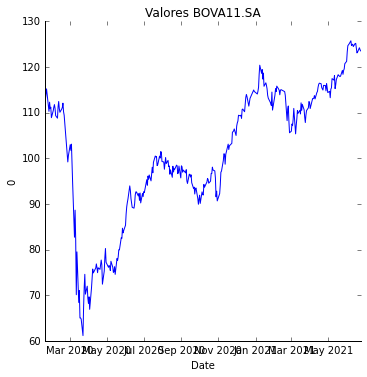

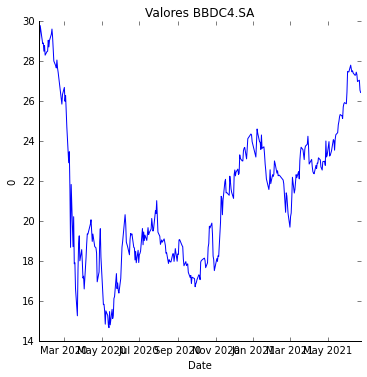

In [44]:
for acao in lista_acoes:
    sns.relplot(x=comPrev[acao].index, y=comPrev[acao][0], 
                data=comPrev[acao], kind='line').set(title='Valores '+acao)

In [45]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
import ta.others as others
import ta.volatility as vola
import ta.trend as trend

In [46]:
bollinger={}
moving_average={}
for acao in lista_acoes:
    bollinger[acao]=previsao_acoes[acao].iloc[tamanhoPrev:casasFinal+tamanhoPrev+10].copy()
    bollinger[acao].drop(columns=[1,2,3,4],inplace=True)
    bollinger[acao].set_index('Date',inplace=True)
    

In [47]:
moving_average={}
for acao in lista_acoes:
    moving_average[acao]=previsao_acoes[acao].iloc[tamanhoPrev:casasFinal+tamanhoPrev+10].copy()
    moving_average[acao].drop(columns=[1,2,3,4],inplace=True)
    moving_average[acao].set_index('Date',inplace=True)
    ema5=trend.ema_indicator(moving_average[acao][0],5)
    ema10=trend.ema_indicator(moving_average[acao][0],10)
    moving_average[acao]['ema5']=ema5
    moving_average[acao]['ema10']=ema10

In [48]:
for acao in lista_acoes:
    bbh=vola.bollinger_hband(bollinger[acao][0])
    bbl=vola.bollinger_lband(bollinger[acao][0])
    bbhind=vola.bollinger_hband_indicator(bollinger[acao][0])
    bblind=vola.bollinger_lband_indicator(bollinger[acao][0])
    bollinger[acao]['hband']=bbh
    bollinger[acao]['lband']=bbl
    bollinger[acao]['hiInd']=bbhind
    bollinger[acao]['loInd']=bblind


In [49]:
for acao in lista_acoes:
    MyBands=vola.BollingerBands(close=bollinger[acao][0], window=5, window_dev=1.5)
#     bbh=vola.bollinger_hband(bollinger[acao][0])
#     bbl=vola.bollinger_lband(bollinger[acao][0])
#     bbhind=vola.bollinger_hband_indicator(bollinger[acao][0])
#     bblind=vola.bollinger_lband_indicator(bollinger[acao][0])
    bollinger[acao]['hband']=MyBands.bollinger_hband()
    bollinger[acao]['lband']=MyBands.bollinger_lband()
    bollinger[acao]['hiInd']=MyBands.bollinger_hband_indicator()
    bollinger[acao]['loInd']=MyBands.bollinger_lband_indicator()

In [50]:
# counter = 0
# for classe in range (0,num_clusters):
#     dif_ultimo_prim=classes_puro[classe][ultima_pos].mean()-classes_puro[classe][0].mean()
#     print('Diferença da média do último item para a média do primeiro item  da classe {}=  {}'.format(classe,dif_ultimo_prim))

In [51]:
def compra(preco,movimentacoes,saldo,estado,qtd):
    movimentacoes+=1
    #taxa=1.0000
    restoTaxa=0.9997
    taxa=0.0003
    if estado==0:# compra simples
        qtdmov=saldo/preco*restoTaxa
        valmov=qtdmov*preco
        qtd=qtd+qtdmov
        saldo=saldo-valmov-(taxa*saldo)
        estado=1
    elif estado==-1:#estava vendido e comprou
        qtdmov=abs(qtd)
        valmov=qtdmov*preco
        qtd=qtd+qtdmov
        saldo=saldo-valmov-(taxa*saldo)
        estado=0
    print('comprou {} acoes por {} cada saldo={:.2f} posicao ={} no dia {:%Y-%m-%d}'.format(qtdmov,valor[0],saldo,qtd,index))
    return movimentacoes,saldo,estado,qtd;
def venda(preco,movimentacoes,saldo,estado,qtd):
    movimentacoes+=1
    #taxa=1
    restoTaxa=0.9997
    taxa=0.0003
    qtdmov=0
    if estado==1: # venda simples
        qtdmov=qtd
        valmov=qtdmov*preco*restoTaxa
        qtd=qtd-qtdmov
        saldo=saldo+valmov
        estado=0
    elif estado==0:# venda descoberta
        qtdmov=saldo/preco*restoTaxa
        valmov=qtdmov*preco
        qtd=qtd-qtdmov
        saldo=saldo+valmov
        estado=-1
    print('vendeu {} acoes por {} cada saldo={:.2f} posicao ={} no dia {:%Y-%m-%d}'.format(qtdmov,valor[0],saldo,qtd,index))
    return movimentacoes,saldo,estado,qtd;

In [52]:
resultados=[]
resultadosaux=[]
for acao in lista_acoes:       
    resultadosaux.append([acao])
#resultados=pd.DataFrame(resultadosaux,columns=['Nome','as'])
resultados=pd.DataFrame(resultadosaux,columns=['Nome'])
resultados.set_index('Nome',inplace=True)
#pegar dados de uma linha resultados.loc[acao]
resultados['Fcnn']=0
resultados['BuyHold']=0
resultados['Lstm']=0
resultados['MACD']=0
resultados['Bollinger']=0

In [53]:
# operando vendido FCNN

vitoriasFcnn=0
perdasFcnn=0
somaSaldo=0
somaSaldoExt=0
negociacoesFcnn={}

for acao in lista_acoes:       
    df_aux=[]
    qtdexterna=10000/comPrev[acao].iloc[0][0]
    #print(comPrev[acao].iloc[0])
    movimentacoes=0
    qtd=0
    saldo=10000
    estado=0
    for iteracao in comPrev[acao].iterrows():
        index=iteracao[0]
        valor=iteracao[1]
        preco=valor[0]
        tipo=0
        #print(index)
        #print(valor["LstmPrev"])       
        if((estado==-1 or estado==0)and int(valor["FcnnPrev"])==ascendente[acao]):#estava vendido e comprou
            movimentacoes,saldo,estado,qtd=compra(preco,movimentacoes,saldo,estado,qtd)
            tipo=1
        elif((estado==1 or estado==0)and int(valor["FcnnPrev"])==queda[acao]):#vendeu
            movimentacoes,saldo,estado,qtd=venda(preco,movimentacoes,saldo,estado,qtd)
            tipo=-1
        daily_list=[index,movimentacoes,estado,saldo,qtd,preco,tipo]
        df_aux.append(daily_list)    
    #print('estado final=',estado)
    if(estado==1):
        movimentacoes,saldo,estado,qtd=venda(preco,movimentacoes,saldo,estado,qtd)
        tipo=1
    elif(estado==-1):
        movimentacoes,saldo,estado,qtd=compra(preco,movimentacoes,saldo,estado,qtd)
        tipo=-1
    daily_list=[index,movimentacoes,estado,saldo,qtd,preco,tipo]
    df_aux.append(daily_list)    
    print('Ação {} Compra seguindo a rede Fcnn={}'.format(acao,saldo))
        #comprar(saldo,index,valor[0],estado)
    saldoexterno=qtdexterna*comPrev[acao].iloc[len(comPrev[acao])-1][0]
    print('Ação {} Compra única ={}'.format(acao,saldoexterno))
    if(movimentacoes>0):
        somaSaldo+=saldo
        somaSaldoExt+=saldoexterno 
        print(acao,'               valida')
        if (saldo>saldoexterno):
            vitoriasFcnn+=1
        else:
            perdasFcnn+=1
    else:       
        print(acao,'               ignorada')
    resultados.at[acao,'Fcnn'] = saldo
    negociacoesFcnn[acao] = pd.DataFrame(df_aux,columns=['Data','movimentacoes','estado','saldo','qtd','preco','tipo'])
    negociacoesFcnn[acao].set_index('Data',inplace=True)
print('Vitorias da rede',vitoriasFcnn)
print('perdas da rede',perdasFcnn)

medsaldo=somaSaldo/(vitoriasFcnn+perdasFcnn)
medsaldoExt=somaSaldoExt/(vitoriasFcnn+perdasFcnn)
print('media do saldo com rede',medsaldo)
print('media do saldo uma compra',medsaldoExt )

vendeu 89.90916251906835 acoes por 111.19000244140625 cada saldo=19997.00 posicao =-89.90916251906835 no dia 2020-01-30
comprou 89.90916251906835 acoes por 108.79000091552734 cada saldo=10209.78 posicao =0.0 no dia 2020-02-10
vendeu 90.76674405803651 acoes por 112.44999694824219 cada saldo=20416.50 posicao =-90.76674405803651 no dia 2020-02-12
comprou 90.76674405803651 acoes por 110.08000183105469 cada saldo=10418.77 posicao =0.0 no dia 2020-02-14
comprou 94.00405141875801 acoes por 110.80000305175781 cada saldo=-0.00 posicao =94.00405141875801 no dia 2020-02-17
vendeu 94.00405141875801 acoes por 110.19999694824219 cada saldo=10356.14 posicao =0.0 no dia 2020-02-20
vendeu 100.52463131214473 acoes por 102.98999786376953 cada saldo=20709.17 posicao =-100.52463131214473 no dia 2020-03-02
comprou 100.52463131214473 acoes por 94.4000015258789 cada saldo=11213.43 posicao =0.0 no dia 2020-03-06
vendeu 126.48164489783687 acoes por 88.62999725341797 cada saldo=22423.50 posicao =-126.48164489783

In [54]:
#operando vendido LSTM
vitoriasLstm=0
perdasLstm=0
somaSaldo=0
somaSaldoExt=0
negociacoesLstm={}

for acao in lista_acoes:       
    df_aux=[]
    qtdexterna=10000/comPrev[acao].iloc[0][0]
    #print(comPrev[acao].iloc[0])
    movimentacoes=0
    qtd=0
    saldo=10000
    estado=0
    for iteracao in comPrev[acao].iterrows():
        index=iteracao[0]
        valor=iteracao[1]
        preco=valor[0]
        tipo=0
        #print(index)
        #print(valor["LstmPrev"])       
        if((estado==-1 or estado==0)and int(valor["LstmPrev"])==ascendente[acao]):#estava vendido e comprou
            movimentacoes,saldo,estado,qtd=compra(preco,movimentacoes,saldo,estado,qtd)
            tipo=1
        elif((estado==1 or estado==0)and int(valor["LstmPrev"])==queda[acao]):#vendeu
            movimentacoes,saldo,estado,qtd=venda(preco,movimentacoes,saldo,estado,qtd)
            tipo=-1
        daily_list=[index,movimentacoes,estado,saldo,qtd,preco,tipo]
        df_aux.append(daily_list)    
    #print('estado final=',estado)
    if(estado==1):
        movimentacoes,saldo,estado,qtd=venda(preco,movimentacoes,saldo,estado,qtd)
        tipo=1
    elif(estado==-1):
        movimentacoes,saldo,estado,qtd=compra(preco,movimentacoes,saldo,estado,qtd)
        tipo=-1
    daily_list=[index,movimentacoes,estado,saldo,qtd,preco,tipo]
    df_aux.append(daily_list)    
    print('Ação {} Compra seguindo a rede Lstm={}'.format(acao,saldo))
        #comprar(saldo,index,valor[0],estado)
    saldoexterno=qtdexterna*comPrev[acao].iloc[len(comPrev[acao])-1][0]
    print('Ação {} Compra única ={}'.format(acao,saldoexterno))
    if(movimentacoes>0):
        somaSaldo+=saldo
        somaSaldoExt+=saldoexterno 
        print(acao,'               valida')
        if (saldo>saldoexterno):
            vitoriasLstm+=1
        else:
            perdasLstm+=1
    else:       
        print(acao,'               ignorada')
    resultados.at[acao,'Lstm'] = saldo
    negociacoesLstm[acao] = pd.DataFrame(df_aux,columns=['Data','movimentacoes','estado','saldo','qtd','preco','tipo'])
    negociacoesLstm[acao].set_index('Data',inplace=True)
print('Vitorias da rede',vitoriasLstm)
print('perdas da rede',perdasLstm)
medsaldo=somaSaldo/(vitoriasLstm+perdasLstm)
medsaldoExt=somaSaldoExt/(vitoriasLstm+perdasLstm)
print('media do saldo com rede',medsaldo)
print('media do saldo uma compra',medsaldoExt )

vendeu 89.90916251906835 acoes por 111.19000244140625 cada saldo=19997.00 posicao =-89.90916251906835 no dia 2020-01-30
comprou 89.90916251906835 acoes por 108.79000091552734 cada saldo=10209.78 posicao =0.0 no dia 2020-02-10
vendeu 90.76674405803651 acoes por 112.44999694824219 cada saldo=20416.50 posicao =-90.76674405803651 no dia 2020-02-12
comprou 90.76674405803651 acoes por 110.08000183105469 cada saldo=10418.77 posicao =0.0 no dia 2020-02-14
comprou 94.00405141875801 acoes por 110.80000305175781 cada saldo=-0.00 posicao =94.00405141875801 no dia 2020-02-17
vendeu 94.00405141875801 acoes por 110.19999694824219 cada saldo=10356.14 posicao =0.0 no dia 2020-02-20
vendeu 100.52463131214473 acoes por 102.98999786376953 cada saldo=20709.17 posicao =-100.52463131214473 no dia 2020-03-02
comprou 100.52463131214473 acoes por 94.4000015258789 cada saldo=11213.43 posicao =0.0 no dia 2020-03-06
vendeu 126.48164489783687 acoes por 88.62999725341797 cada saldo=22423.50 posicao =-126.48164489783

In [55]:
#usando moving average
vitoriasMoving=0
perdasMoving=0
somaSaldoMov=0
somaSaldoExtMov=0
negociacoesMoving={}


for acao in lista_acoes:       
    df_aux=[]
    qtdexterna=10000/moving_average[acao].iloc[20][0]
    #print(bollinger[acao].iloc[20])
    movimentacoes=0
    qtd=0
    saldo=10000
    estado=0
    #daily_list=[]
    #df_aux.append(daily_list) 
    ema1 = moving_average[acao]['ema5']
    ema2 = moving_average[acao]['ema10']
    for iteracao in comPrev[acao].iterrows():
        index=iteracao[0]
        valor=iteracao[1]
        preco=valor[0]
        tipo=0
        # aqui basicamente é a regra de trade
        #data['p'] = np.where(data['SMA1'] > data['SMA2'], 1, -1) # 1=comprado -1 short positions
        #data['p'] = data['p'].shift(1)
     
        if(ema1[index]>ema2[index] and (estado==0 or estado==-1)):
            movimentacoes,saldo,estado,qtd=compra(preco,movimentacoes,saldo,estado,qtd)
            tipo=1
        elif(ema1[index]<ema2[index] and (estado==0 or estado==1)):#vendeu
            movimentacoes,saldo,estado,qtd=venda(preco,movimentacoes,saldo,estado,qtd)
            tipo=-1
        daily_list=[index,movimentacoes,estado,saldo,qtd,preco,tipo]
        df_aux.append(daily_list)    
    #print('estado final=',estado)
    if(estado==1):
        movimentacoes,saldo,estado,qtd=venda(preco,movimentacoes,saldo,estado,qtd)
        tipo=1
    elif(estado==-1):
        movimentacoes,saldo,estado,qtd=compra(preco,movimentacoes,saldo,estado,qtd)
        tipo=-1
    daily_list=[index,movimentacoes,estado,saldo,qtd,preco,tipo]
    df_aux.append(daily_list)    
    print('Ação {} Compra seguindo a Média Móvel={}'.format(acao,saldo))
        #comprar(saldo,index,valor[0],estado)
    saldoexterno=qtdexterna*comPrev[acao].iloc[len(comPrev[acao])-1][0]
    print('Ação {} Compra única ={}'.format(acao,saldoexterno))
    if(movimentacoes>0):
        somaSaldoMov+=saldo
        somaSaldoExtMov+=saldoexterno 
        print(acao,'               valida')
        if (saldo>saldoexterno):
            vitoriasMoving+=1
        else:
            perdasMoving+=1
    else:       
        print(acao,'               ignorada')
    resultados.at[acao,'MACD'] = saldo
    negociacoesMoving[acao] = pd.DataFrame(df_aux,columns=['Data','movimentacoes','estado','saldo','qtd','preco','tipo'])
    negociacoesMoving[acao].set_index('Data',inplace=True)
# print('somaSaldoMov',somaSaldoMov)
# print('somaSaldoExtMov',somaSaldoExtMov)
print('Vitorias da Média',vitoriasMoving)
print('perdas da Média',perdasMoving)
medsaldo=somaSaldoMov/(vitoriasMoving+perdasMoving)
medsaldoExt=somaSaldoExtMov/(vitoriasMoving+perdasMoving)
print('media do saldo com Moving Average',medsaldo)
print('media do saldo uma compra',medsaldoExt )

comprou 88.74389582412394 acoes por 112.6500015258789 cada saldo=0.00 posicao =88.74389582412394 no dia 2020-01-21
vendeu 88.74389582412394 acoes por 110.29000091552734 cada saldo=9784.63 posicao =0.0 no dia 2020-01-27
vendeu 87.10322732094315 acoes por 112.30000305175781 cada saldo=19566.32 posicao =-87.10322732094315 no dia 2020-01-28
comprou 87.10322732094315 acoes por 112.44999694824219 cada saldo=9765.69 posicao =0.0 no dia 2020-02-12
comprou 88.03213157252456 acoes por 110.9000015258789 cada saldo=-0.00 posicao =88.03213157252456 no dia 2020-02-13
vendeu 88.03213157252456 acoes por 110.08000183105469 cada saldo=9687.67 posicao =0.0 no dia 2020-02-14
vendeu 87.40761248896588 acoes por 110.80000305175781 cada saldo=19372.43 posicao =-87.40761248896588 no dia 2020-02-17
comprou 87.40761248896588 acoes por 112.08000183105469 cada saldo=9569.98 posicao =0.0 no dia 2020-02-19
vendeu 86.81584333992457 acoes por 110.19999694824219 cada saldo=19137.08 posicao =-86.81584333992457 no dia 20

In [56]:
#usando Bollnger trends
vitoriasBollinger=0
perdasBollinger=0
somaSaldoMov=0
somaSaldoExtMov=0
negociacoesBollinger={}

for acao in lista_acoes:       
    df_aux=[]
    qtdexterna=10000/bollinger[acao].iloc[20][0]
    #print(bollinger[acao].iloc[20])
    movimentacoes=0
    qtd=0
    saldo=10000
    estado=0
    print(acao)
    for iteracao in bollinger[acao].iterrows():
        index=iteracao[0]
        valor=iteracao[1]
        preco=valor[0]
        tipo=0
        #print(valor)
        if(int(valor['hiInd'])==1 and (estado==0 or estado==-1)):
            movimentacoes,saldo,estado,qtd=compra(preco,movimentacoes,saldo,estado,qtd)
            tipo=1
        elif(int(valor['loInd'])==1 and (estado==0 or estado==1)):#vendeu
            movimentacoes,saldo,estado,qtd=venda(preco,movimentacoes,saldo,estado,qtd)
            tipo=-1
        daily_list=[index,movimentacoes,estado,saldo,qtd,preco,tipo]
        df_aux.append(daily_list)    
    #print('estado final=',estado)
    if(estado==1):
        movimentacoes,saldo,estado,qtd=venda(preco,movimentacoes,saldo,estado,qtd)
        tipo=1
    elif(estado==-1):
        movimentacoes,saldo,estado,qtd=compra(preco,movimentacoes,saldo,estado,qtd)
        tipo=-1
    daily_list=[index,movimentacoes,estado,saldo,qtd,preco,tipo]
    df_aux.append(daily_list)    
    print('Ação {} Compra seguindo as Bollinger Bands={}'.format(acao,saldo))
        #comprar(saldo,index,valor[0],estado)
    saldoexterno=qtdexterna*comPrev[acao].iloc[len(comPrev[acao])-1][0]
    print('Ação {} Compra única ={}'.format(acao,saldoexterno))
    if(movimentacoes>0):
        somaSaldoMov+=saldo
        somaSaldoExtMov+=saldoexterno 
        print('               valida')
        if (saldo>saldoexterno):
            vitoriasBollinger+=1
        else:
            perdasBollinger+=1
    else:       
        print('                     ignorada')
    resultados.at[acao,'Bollinger'] = saldo
    resultados.at[acao,'BuyHold'] = saldoexterno
    negociacoesBollinger[acao] = pd.DataFrame(df_aux,columns=['Data','movimentacoes','estado','saldo','qtd','preco','tipo'])
    negociacoesBollinger[acao].set_index('Data',inplace=True)
# print('somaSaldoMov',somaSaldoMov)
# print('somaSaldoExtMov',somaSaldoExtMov)
print('Vitorias da Média',vitoriasBollinger)
print('perdas da Média',perdasBollinger)
medsaldo=somaSaldoMov/(vitoriasBollinger+perdasBollinger)
medsaldoExt=somaSaldoExtMov/(vitoriasBollinger+perdasBollinger)
print('media do saldo com Bollinger',medsaldo)
print('media do saldo uma compra',medsaldoExt )

BOVA11.SA
comprou 88.40643648853006 acoes por 113.08000183105469 cada saldo=0.00 posicao =88.40643648853006 no dia 2020-01-13
vendeu 88.40643648853006 acoes por 110.29000091552734 cada saldo=9747.42 posicao =0.0 no dia 2020-01-27
vendeu 89.48114320179508 acoes por 108.9000015258789 cada saldo=19491.92 posicao =-89.48114320179508 no dia 2020-01-31
comprou 89.48114320179508 acoes por 112.08000183105469 cada saldo=9457.02 posicao =0.0 no dia 2020-02-19
vendeu 95.3042984215131 acoes por 99.19999694824219 cada saldo=18911.21 posicao =-95.3042984215131 no dia 2020-02-27
comprou 95.3042984215131 acoes por 71.7300033569336 cada saldo=12069.36 posicao =0.0 no dia 2020-03-25
comprou 168.58652462692842 acoes por 71.56999969482422 cada saldo=-0.00 posicao =168.58652462692842 no dia 2020-04-06
vendeu 168.58652462692842 acoes por 72.41000366210938 cada saldo=12203.69 posicao =0.0 no dia 2020-04-24
vendeu 161.80407568789073 acoes por 75.4000015258789 cada saldo=24403.72 posicao =-161.80407568789073 n

In [57]:
resultadosaux=resultados.reindex(columns=['BuyHold','Fcnn','Lstm','MACD','Bollinger'])


In [58]:
resultadosaux

,BuyHold,Fcnn,Lstm,MACD,Bollinger
Nome,,,,,
BOVA11.SA,11108,19135,18418,15597,15866
BBDC4.SA,9275,10000,10840,12190,14964


In [59]:
porcento=[]
resultadosPorcentagem=0
colunas=resultadosaux.columns.tolist()
for rowIndex, row in resultadosaux.iterrows(): #iterate over rows
    linha=[rowIndex]
    for columnIndex, value in row.items():
        value=((value/10000)-1)*100
        #print(value, end="\t")
        linha.append(value)
    porcento.append(linha)
    #print()
resultadosPorcentagem=pd.DataFrame(porcento)
resultadosPorcentagem.columns=['Stock','BuyHold','Fcnn','Lstm','MACD','Bollinger']
resultadosPorcentagem.set_index('Stock',inplace=True)
resultadosPorcentagem
# resultadosPorcentagem=resultadosPorcentagem.drop(['EMBR3.SA'])
# resultadosPorcentagem=resultadosPorcentagem.drop(['BRFS3.SA'])
# resultadosPorcentagem=resultadosPorcentagem.drop(['VALE3.SA'])
# resultadosPorcentagem=resultadosPorcentagem.drop(['JBSS3.SA'])
# resultadosPorcentagem=resultadosPorcentagem.drop(['CIEL3.SA'])
# resultadosPorcentagem=resultadosPorcentagem.drop(['CCRO3.SA'])
# resultadosPorcentagem=resultadosPorcentagem.drop(['ABEV3.SA'])
# resultadosPorcentagem=resultadosPorcentagem.drop(['TIMS3.SA'])
# resultadosPorcentagem=resultadosPorcentagem.drop(['CYRE3.SA'])
# resultadosPorcentagem=resultadosPorcentagem.drop(['KLBN4.SA'])

# resultadosPorcentagem=resultadosPorcentagem.drop(['PETR4.SA'])

# resultadosPorcentagem=resultadosPorcentagem.drop(['MRVE3.SA'])



,BuyHold,Fcnn,Lstm,MACD,Bollinger
Stock,,,,,
BOVA11.SA,11.08,91.35,84.18,55.97,58.66
BBDC4.SA,-7.25,0.00,8.40,21.90,49.64


In [60]:
resultadosPorcentagem

,BuyHold,Fcnn,Lstm,MACD,Bollinger
Stock,,,,,
BOVA11.SA,11.08,91.35,84.18,55.97,58.66
BBDC4.SA,-7.25,0.00,8.40,21.90,49.64


<AxesSubplot:>

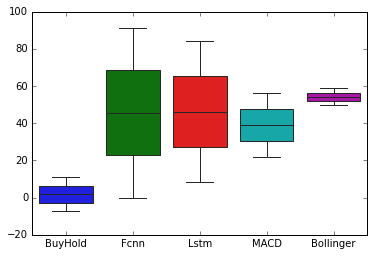

In [61]:
sns.boxplot(data=resultadosPorcentagem)


<AxesSubplot:>

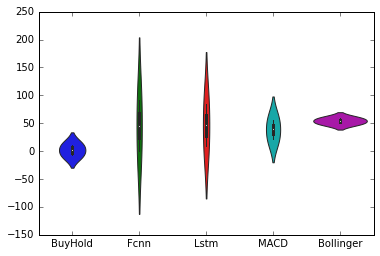

In [62]:
sns.violinplot(data=resultadosPorcentagem)


In [63]:
# for columnIndex, value in resultadosPorcentagem.items():
#     ax=sns.boxplot(value)
#     plt.plot()
#     %print(value)
#     print()

([0, 1], [Text(0, 0, 'BOVA11.SA'), Text(1, 0, 'BBDC4.SA')])

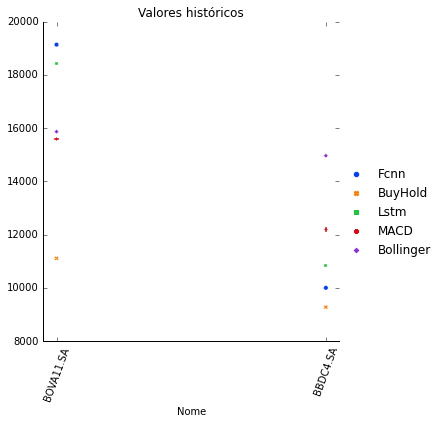

In [64]:
resultados
sns.relplot(
    data=resultados, kind="scatter",
   
    #, col="Date",
   # hue="Significancia", size="Significancia", style="Significancia",
   facet_kws=dict(sharex=False)
    ,palette="bright"
).set(title='Valores históricos')
plt.xticks(rotation=70)


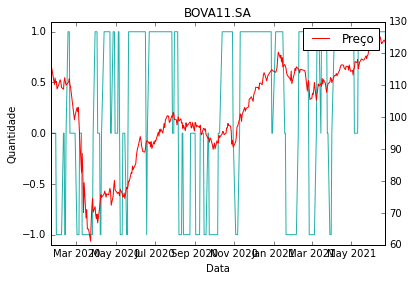

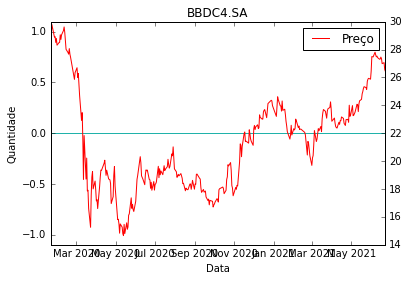

In [65]:
for acao in lista_acoes:
    fig, ax_left = plt.subplots()
    ax_right = ax_left.twinx()

    ax_left.plot(negociacoesFcnn[acao]['estado'],label = 'Quantidade', color='lightseagreen')
    ax_left.set_ylabel("Quantidade")
    ax_left.set_xlabel('Data')
    ax_left.set_ylim((-1.1, 1.1))
    #ax_left.tick_params(axis='y', labelcolor='blue')
    #ax_left.legend(loc=0)

    ax_right.plot(negociacoesFcnn[acao]['preco'],label= 'Preço', color='red')
    #ax_right.set_ylabel("Preço")
    #ax_right.tick_params(axis='y', labelcolor='red')
    #ax_right.legend(loc=0)
    plt.title(acao)
    plt.legend()
    plt.plot()

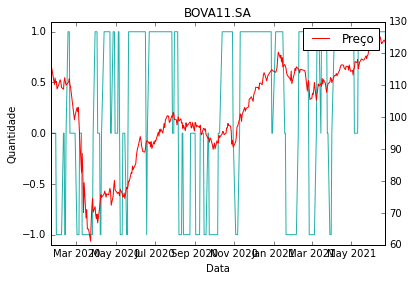

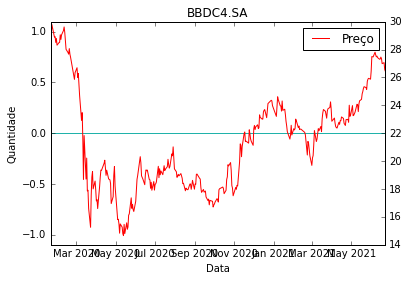

In [66]:
for acao in lista_acoes:
    fig, ax_left = plt.subplots()
    ax_right = ax_left.twinx()

    ax_left.plot(negociacoesFcnn[acao]['estado'],label = 'Quantidade', color='lightseagreen')
    ax_left.set_ylabel("Quantidade")
    ax_left.set_xlabel('Data')
    ax_left.set_ylim((-1.1, 1.1))
    #ax_left.tick_params(axis='y', labelcolor='blue')
    #ax_left.legend(loc=0)

    ax_right.plot(negociacoesFcnn[acao]['preco'],label= 'Preço', color='red')
    #ax_right.set_ylabel("Preço")
    #ax_right.tick_params(axis='y', labelcolor='red')
    #ax_right.legend(loc=0)
    plt.title(acao)
    plt.legend()
    plt.plot()

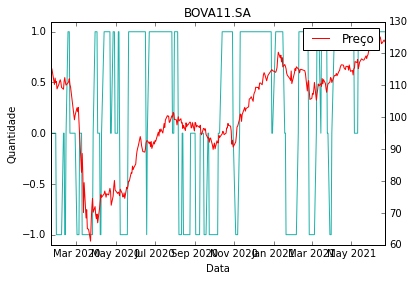

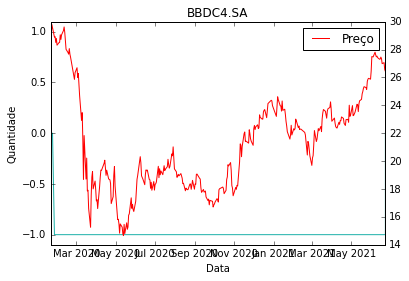

In [67]:
for acao in lista_acoes:
    fig, ax_left = plt.subplots()
    ax_right = ax_left.twinx()

    ax_left.plot(negociacoesLstm[acao]['estado'],label = 'Quantidade', color='lightseagreen')
    ax_left.set_ylabel("Quantidade")
    ax_left.set_xlabel('Data')
    ax_left.set_ylim((-1.1, 1.1))
    #ax_left.tick_params(axis='y', labelcolor='blue')
    #ax_left.legend(loc=0)

    ax_right.plot(negociacoesLstm[acao]['preco'],label= 'Preço', color='red')
    #ax_right.set_ylabel("Preço")
    #ax_right.tick_params(axis='y', labelcolor='red')
    #ax_right.legend(loc=0)
    plt.title(acao)
    plt.legend()
    plt.plot()

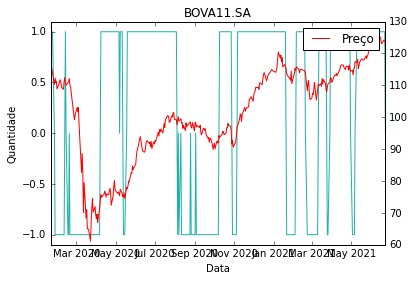

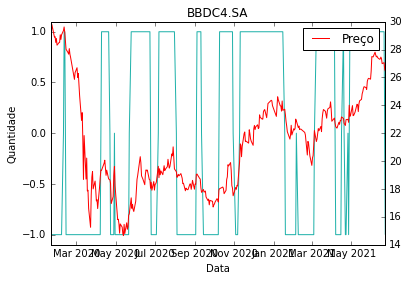

In [68]:
for acao in lista_acoes:
    fig, ax_left = plt.subplots()
    ax_right = ax_left.twinx()

    ax_left.plot(negociacoesMoving[acao]['estado'],label = 'Quantidade', color='lightseagreen')
    ax_left.set_ylabel("Quantidade")
    ax_left.set_xlabel('Data')
    ax_left.set_ylim((-1.1, 1.1))
    #ax_left.tick_params(axis='y', labelcolor='blue')
    #ax_left.legend(loc=0)

    ax_right.plot(negociacoesMoving[acao]['preco'],label= 'Preço', color='red')
    #ax_right.set_ylabel("Preço")
    #ax_right.tick_params(axis='y', labelcolor='red')
    #ax_right.legend(loc=0)
    plt.title(acao)
    plt.legend()
    plt.plot()

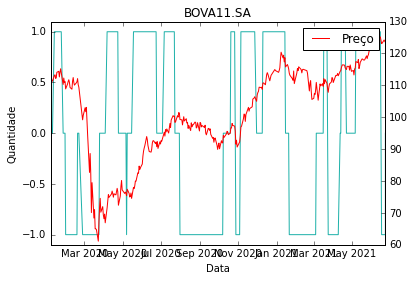

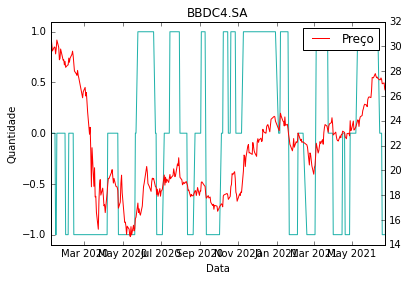

In [69]:
for acao in lista_acoes:
    fig, ax_left = plt.subplots()
    ax_right = ax_left.twinx()

    ax_left.plot(negociacoesBollinger[acao]['estado'],label = 'Quantidade', color='lightseagreen')
    ax_left.set_ylabel("Quantidade")
    ax_left.set_xlabel('Data')
    ax_left.set_ylim((-1.1, 1.1))
    #ax_left.tick_params(axis='y', labelcolor='blue')
    #ax_left.legend(loc=0)

    ax_right.plot(negociacoesBollinger[acao]['preco'],label= 'Preço', color='red')
    #ax_right.set_ylabel("Preço")
    #ax_right.tick_params(axis='y', labelcolor='red')
    #ax_right.legend(loc=0)
    plt.title(acao)
    plt.legend()
    plt.plot()

In [ ]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
import ta.others as others
import ta.volatility as vola
dataPrices =df_acoes['BBDC4.SA']
data = pd.DataFrame()
data['SMA1'] = dataPrices.rolling(10).mean()
data['SMA2'] = dataPrices.rolling(20).mean()
data.plot(figsize=(10, 6));

# aqui basicamente é a regra de trade
data['p'] = np.where(data['SMA1'] > data['SMA2'], 1, -1) # 1=comprado -1 short positions
data['p'] = data['p'].shift(1)
data.dropna(inplace=True)
data.plot(figsize=(10, 6), secondary_y='p');

In [ ]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
import ta.others as others
import ta.volatility as vola
dataPrices =df_acoes['BBDC4.SA']
data = pd.DataFrame()
data['SMA1'] = dataPrices.rolling(10).mean()
data['SMA2'] = dataPrices.rolling(20).mean()
data.plot(figsize=(10, 6));

# aqui basicamente é a regra de trade
data['p'] = np.where(data['SMA1'] > data['SMA2'], 1, -1) # 1=comprado -1 short positions
data['p'] = data['p'].shift(1)
data.dropna(inplace=True)
data.plot(figsize=(10, 6), secondary_y='p');

In [ ]:
dataPrices =df_acoes['BBDC4.SA']
data = pd.DataFrame()
data['SMA1'] = dataPrices.rolling(10).mean()
data['SMA2'] = dataPrices.rolling(20).mean()
data.plot(figsize=(10, 6));

# aqui basicamente é a regra de trade
data['p'] = np.where(data['SMA1'] > data['SMA2'], 1, -1) # 1=comprado -1 short positions
data['p'] = data['p'].shift(1)
data.dropna(inplace=True)
data.plot(figsize=(10, 6), secondary_y='p');

In [ ]:
bbh=vola.bollinger_hband(df_acoes['BBDC4.SA'])
print(bbh)
bbl=vola.bollinger_lband(df_acoes['BBDC4.SA'])
print(bbl)
bbhind=vola.bollinger_hband_indicator(df_acoes['BBDC4.SA'])

bblind=vola.bollinger_lband_indicator(df_acoes['BBDC4.SA'])

#others.daily_return(df_acoes['BBDC4.SA'])

In [ ]:
sns.relplot(
    data=bbhind, kind="line"
    ,palette="bright"
)

In [ ]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(bbh,label = 'asd', color='lightseagreen')
#ax_left.set_ylabel("Quantidade")
#ax_left.set_xlabel('Data')
#ax_left.set_ylim((-1.1, 1.1))
#ax_left.tick_params(axis='y', labelcolor='blue')
#ax_left.legend(loc=0)

ax_right.plot(bbl,label= 'kkk', color='plum')
#ax_right.set_ylabel("Preço")
#ax_right.tick_params(axis='y', labelcolor='red')
#ax_right.legend(loc=0)
plt.title(acao)
plt.legend()
plt.plot()

In [ ]:
import tensorflow.keras.models
#from tensorflow.keras.models import plot_model

# tf.keras.utils.plot_model(
#     model,
#     to_file="model.png",
#     show_shapes=False,
#     show_dtype=False,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=96,
#     layer_range=None,
# )

modeloLstm=Sequential()
    #lstm.add(teste)
    #model2.add(Input(shape=(30,),name='Entradas'))
#lstm.add(Input(shape=(30,1),name='Entradas'))
#lstm.add(tf.keras.layers.Embedding(10,3))
modeloLstm.add(LSTM(15 ,input_shape=(1,15),return_sequences = True))
#modeloLstm.add(Dropout(0.05))
modeloLstm.add(LSTM(60 ,input_shape=(1,15),return_sequences = True))
#modeloLstm.add(Dropout(0.05))
modeloLstm.add(LSTM(60 ,return_sequences = True))
#modeloLstm.add(Dropout(0.05))
modeloLstm.add(LSTM(30 ,return_sequences = True))
#modeloLstm.add(Dropout(0.05))
modeloLstm.add(LSTM(30 ,return_sequences = True))
modeloLstm.add(LSTM(15 ,return_sequences = True))

modeloLstm.add(Dense(3, activation='softmax', kernel_initializer='glorot_normal'))

modeloLstm.summary()
# plot_model() 

# tf.keras.utils.plot_model(
#     modeloLstm,
#     to_file="model.png",
#     show_shapes=False,
#     show_dtype=False,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=96,
#     layer_range=None,
# )

In [ ]:
keras.utils.plot_model(modeloLstm, "lstm.png",show_layer_names=False, show_shapes=True,dpi=128)
